# Libs

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from scipy.signal import savgol_filter 

# Load data

In [30]:
df = pd.read_parquet("../cleaned/restructured3.parquet")

df['timestamp'] = pd.to_datetime(df['timestamp'])
df.sort_values('location',inplace=True)
df['location'] = df['location'].astype(str)

print(df)

                       timestamp location    lat     lon     P1     P2   
201176 2019-01-31 13:34:00+00:00        6 -1.259  36.799  11.77   2.90  \
42669  2018-07-20 23:50:00+00:00        6 -1.259  36.799  11.63   9.63   
42663  2018-07-20 23:48:00+00:00        6 -1.259  36.799  14.40   9.33   
42657  2018-07-20 23:45:00+00:00        6 -1.259  36.799  15.20   8.23   
42653  2018-07-20 23:43:00+00:00        6 -1.259  36.799   9.90   8.47   
...                          ...      ...    ...     ...    ...    ...   
25291  2023-03-08 06:57:00+00:00     3596 -1.295  36.860  39.40  32.00   
25300  2023-03-08 07:00:00+00:00     3596 -1.295  36.860  39.00  32.50   
25310  2023-03-08 07:03:00+00:00     3596 -1.295  36.860  39.80  31.80   
24692  2023-03-08 03:32:00+00:00     3596 -1.295  36.860  69.00  53.00   
103256 2023-03-31 16:47:00+00:00     3596 -1.295  36.860  24.80  21.00   

        humidity  temperature    P0  
201176      37.3         26.8   NaN  
42669       66.7         19.8   NaN

# Plotting

## Temperature

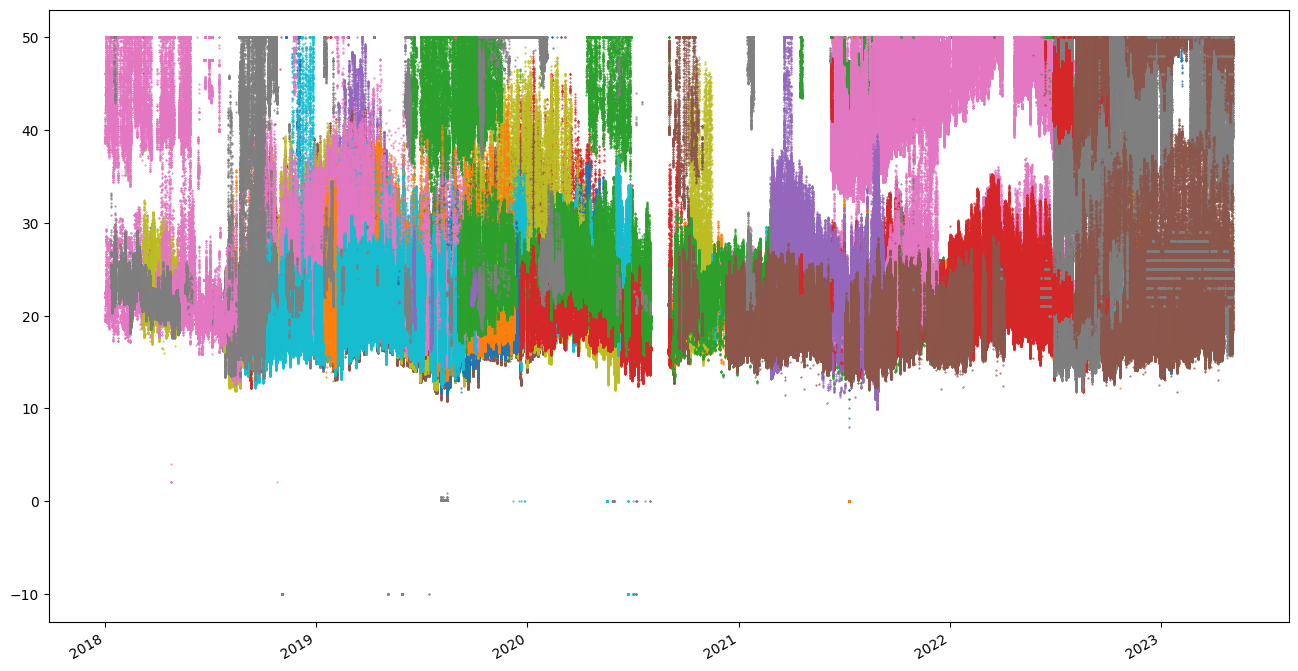

In [6]:
def plot(df, category):
    fig = plt.figure(category, figsize=(16,9))

    for location in list(set(df['location'])):
        values = df.loc[df['location'] == location][[category,'timestamp']]
        plt.scatter(values.timestamp,values[category],s=0.2,label=location)

    plt.gcf().autofmt_xdate()

plot(df, 'temperature')

### Replace outliers

It seems that Nairobi max temperature over a year is never greater than 30°C and never lower than 10°C, so let's cut at 50°C and -10°C to be sure to not lose real data
Mean temperature is approximately 18.8°C

In [4]:
df_temperature = df

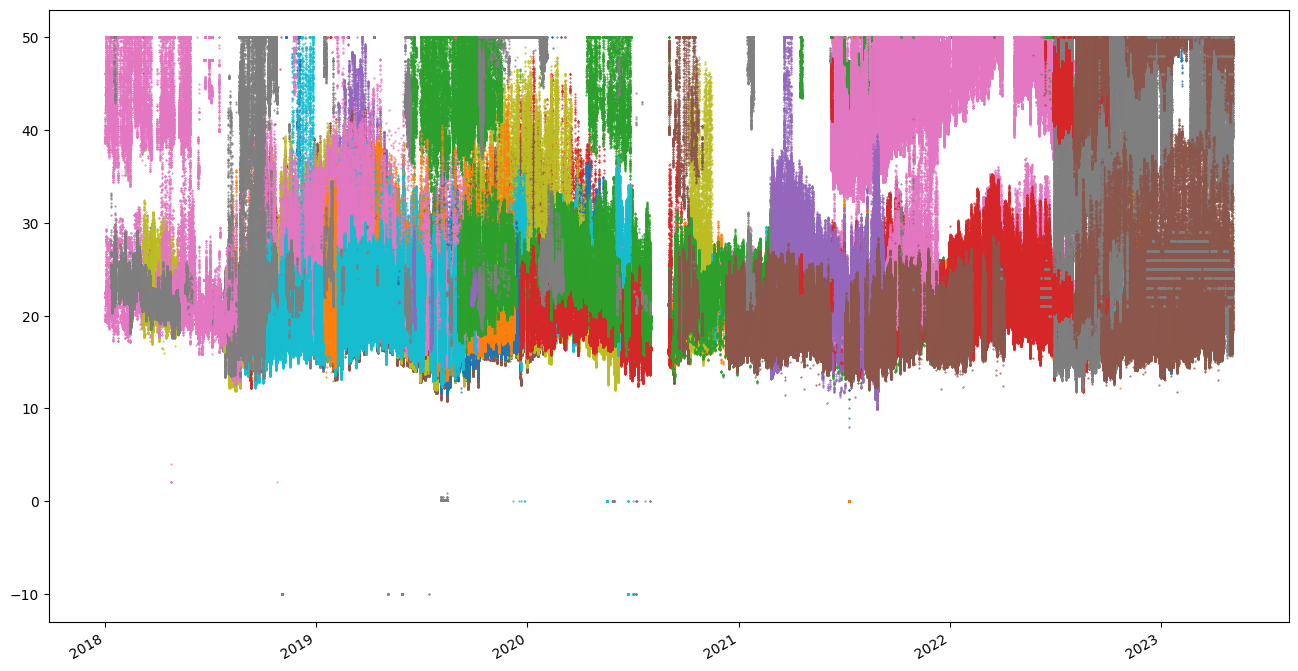

In [7]:
df_temperature['temperature'].clip(-10,50,inplace=True)
plot(df_temperature, 'temperature')

In [8]:
locations = list(set(df.location))
print(len(locations))
print(locations)

58
['17', '3596', '38', '72', '51', '61', '16', '21', '41', '53', '37', '76', '74', '32', '62', '31', '18', '28', '27', '60', '40', '3580', '67', '48', '3522', '71', '26', '50', '49', '59', '3579', '69', '77', '35', '36', '43', '46', '3573', '52', '55', '68', '29', '44', '25', '3505', '33', '30', '6', '20', '34', '57', '58', '70', '78', '63', '3576', '8', '7']


In [9]:
mean_temperature_nairobi = 18.8
location_indicator = pd.DataFrame(columns=['quantity','quality','mean_temperature'],index=locations)

for loc in locations:
    values = df_temperature.loc[df_temperature['location'] == loc][['temperature']]
    location_indicator.loc[loc,'mean_temperature'] = np.mean(values)
    location_indicator.loc[loc,'quality'] = (abs(np.mean(values)-mean_temperature_nairobi)/mean_temperature_nairobi)*100
    location_indicator.loc[loc,'quantity'] = (len(values)/len(df_temperature.temperature))*100

print(location_indicator.sort_values(by='quality'))

      quantity     quality mean_temperature
38    0.163842    0.021502        18.795958
33    5.800953    2.499702        19.269944
3522  0.731237    4.788496        19.700237
68    0.810219    7.124769        20.139456
17    0.001326    7.390548        20.189423
34    2.403615    8.276368        20.355957
26    1.180127    8.336569        20.367275
35    5.667227    9.565608        20.598334
76    4.584268   11.967519        21.049894
28    1.561141   12.100737        21.074939
72    1.614008   12.125722        21.079636
29    3.303097   12.201484        21.093879
51    0.005666   12.351712        21.122122
21    0.319267   13.390335        21.317383
30    2.617423   14.107179         21.45215
48    0.197299   14.624386        21.549385
44    0.045788   15.916076        21.792222
27    4.657847   16.122969        21.831118
63    0.096817    16.59062        21.919037
32    0.859421   16.865685        21.970749
41    1.132462   16.904434        21.978034
20    0.206316    17.30421      

4027265
50.36916404321082


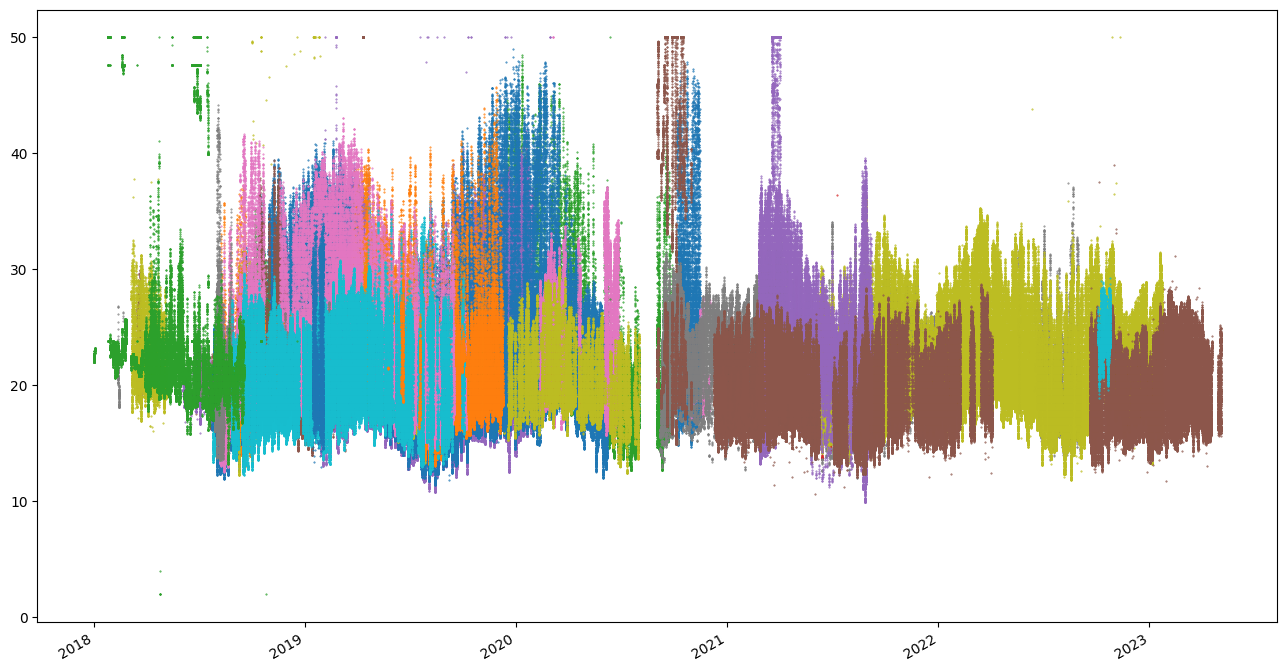

In [20]:
fig = plt.figure('temperature', figsize=(16,9))

pourcentage_of_initial_data = 0

for location in list(set(df['location'])):
    if location_indicator.loc[location,'quality'] < 25:
        values = df.loc[df['location'] == location][['temperature','timestamp']]
        pourcentage_of_initial_data += len(values)
        plt.scatter(values.timestamp,values['temperature'],s=0.2,label=location)
print(pourcentage_of_initial_data)
pourcentage_of_initial_data = pourcentage_of_initial_data/len(df_temperature['temperature'])
print(pourcentage_of_initial_data*100)
plt.gcf().autofmt_xdate()

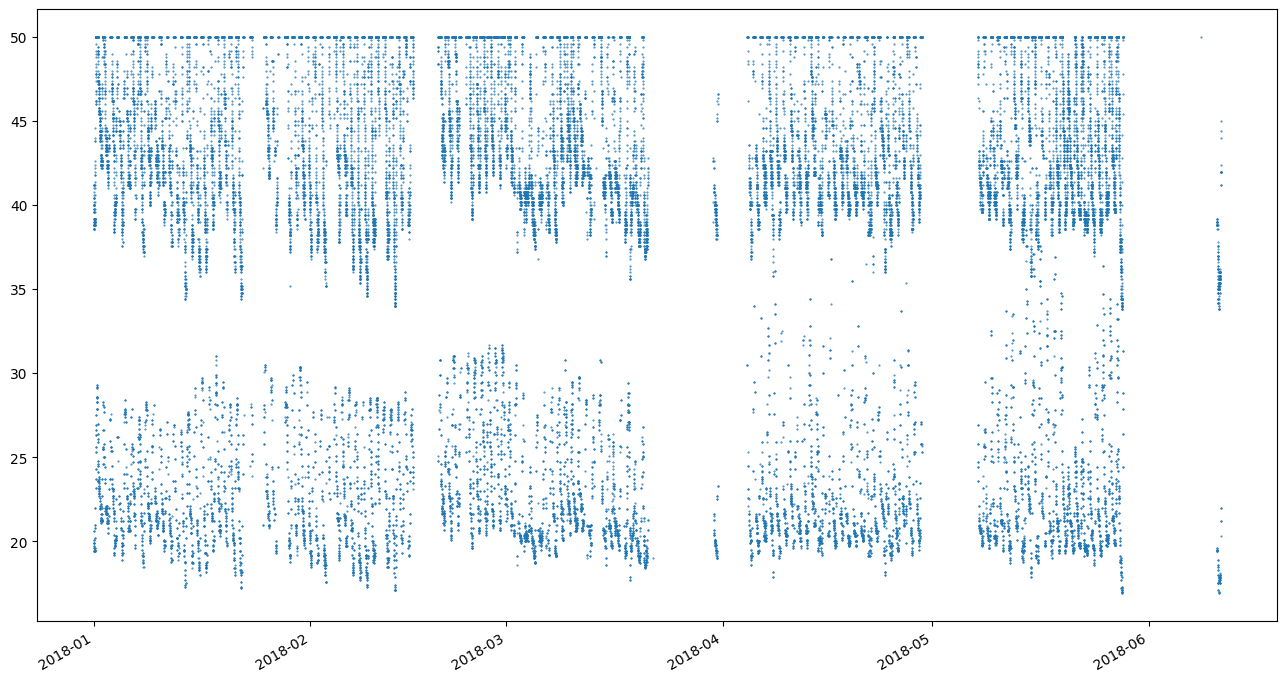

In [19]:
fig = plt.figure('temperature', figsize=(16,9))
location = '16'
values = df_temperature.loc[(df_temperature['location'] == location) & (df_temperature['timestamp'].dt.year == 2018)][['temperature','timestamp']]
# print(values)
plt.scatter(values.timestamp,values['temperature'],s=0.2,label=location)

plt.gcf().autofmt_xdate()

In [ ]:
# for column in df.columns:
#     df[column].fillna(method='ffill', inplace=True)

## Humidity

In [31]:
df_humidity = df

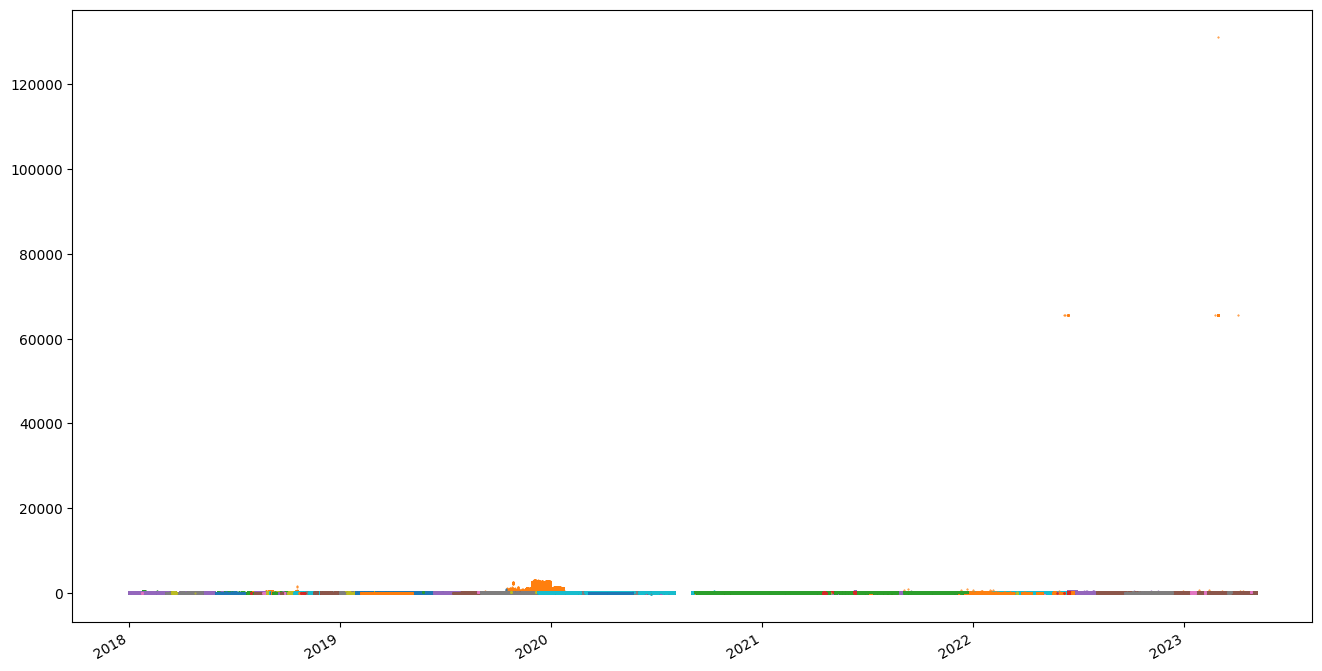

In [8]:
fig = plt.figure('humidity', figsize=(16,9))

for location in list(set(df['location'])):
    humidity = df.loc[df['location'] == location][['humidity','timestamp']]
    plt.scatter(humidity.timestamp,humidity.humidity,s=0.2,label=location)

plt.gcf().autofmt_xdate()

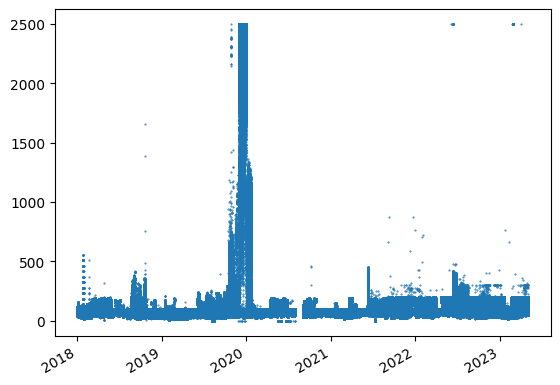

In [33]:
time_humidity_clip = df_humidity['timestamp']
humidity_clip = df_humidity['humidity'].clip(0,100)

plt.scatter(time_humidity_clip,humidity_clip,s=0.2,label=location)
plt.gcf().autofmt_xdate()

### Replace outilers

## P0

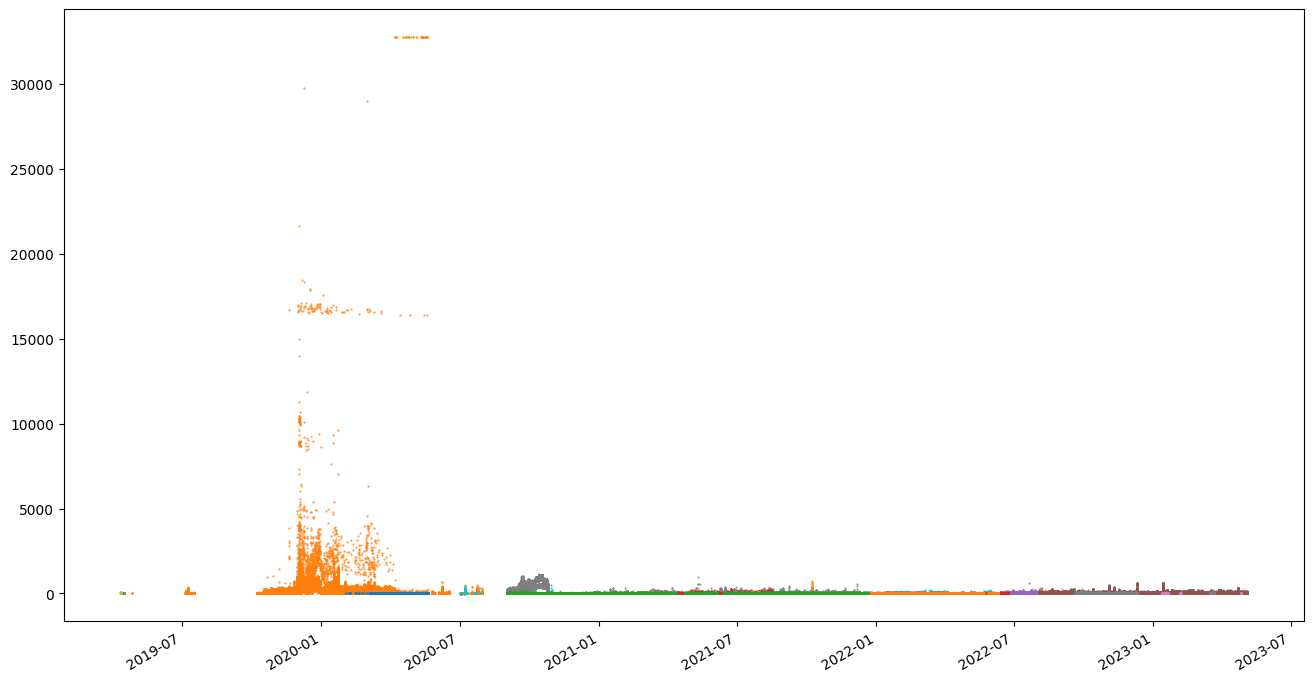

In [9]:
fig = plt.figure('P0', figsize=(16,9))

for location in list(set(df['location'])):
    P0 = df.loc[df['location'] == location][['P0','timestamp']]
    plt.scatter(P0.timestamp,P0.P0,s=0.2,label=location)

plt.gcf().autofmt_xdate()

## P1

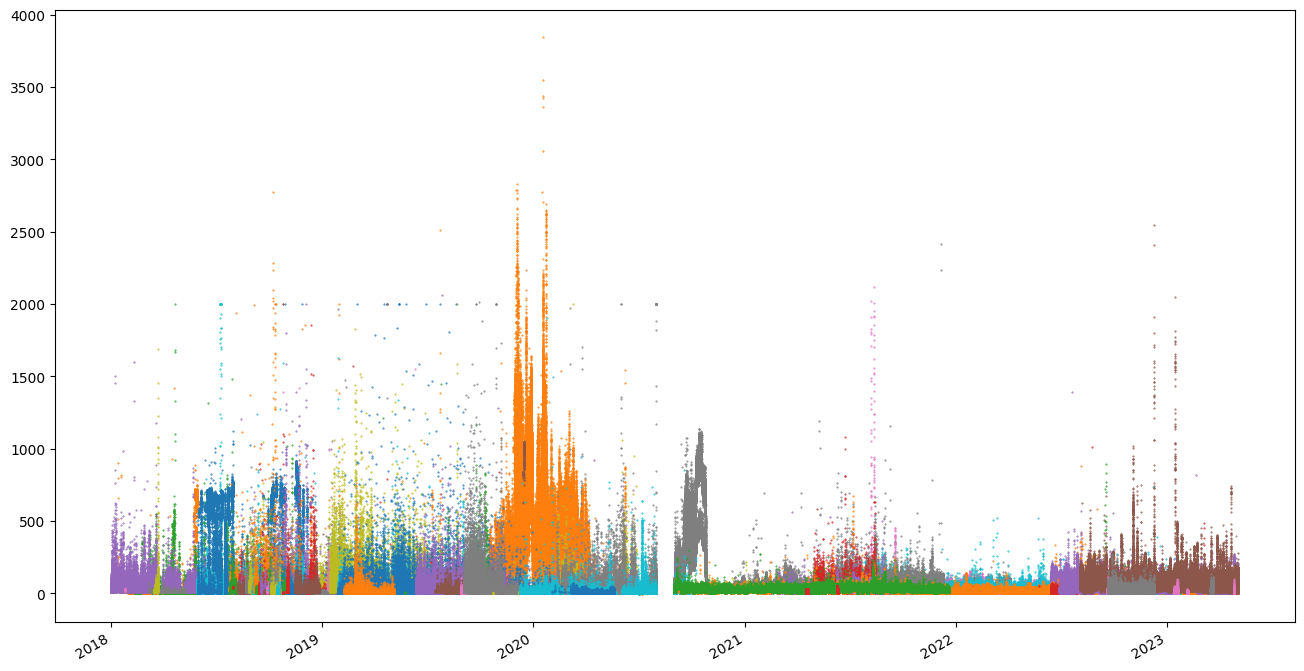

In [10]:
fig = plt.figure('P1', figsize=(16,9))

for location in list(set(df['location'])):
    P1 = df.loc[df['location'] == location][['P1','timestamp']]
    plt.scatter(P1.timestamp,P1.P1,s=0.2,label=location)

plt.gcf().autofmt_xdate()

## P2

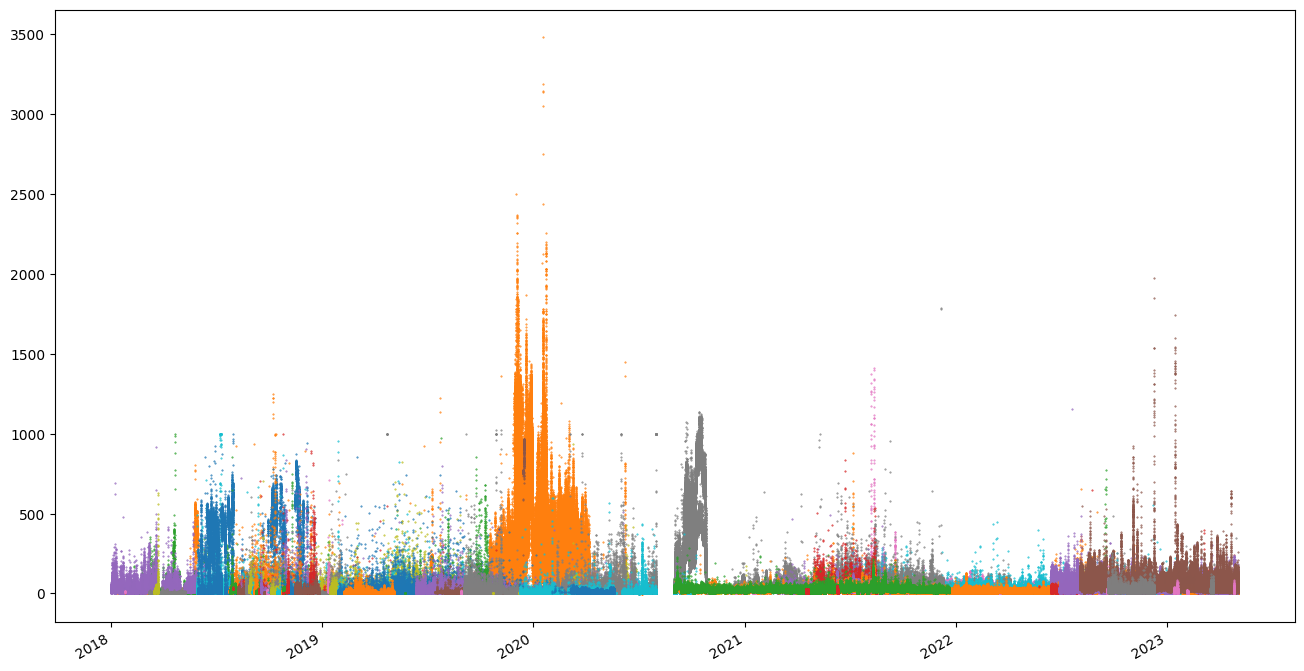

In [11]:
fig = plt.figure('P2', figsize=(16,9))

for location in list(set(df['location'])):
    P2 = df.loc[df['location'] == location][['P2','timestamp']]
    plt.scatter(P2.timestamp,P2.P2,s=0.2,label=location)

plt.gcf().autofmt_xdate()